# 가설 10: 성적과 FA 잔류율
"플레이년도 팀 성적이 좋은 구단일수록 (5등 이상) 이적률이 높으며, 이는 선수의 개인 성적보다 더 강한 영향을 미친다."

In [ ]:
!pip install gdown

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## gdown 사용법

1. 구글 드라이브 내 csv 파일 공유 -> 일반 엑세스 - 링크가 있는 모든 사용자 - 편집자 -> 링크 복사
2. https://drive.google.com/file/d/1NJeX9UlxSi22XTml2oa6eo9JX1LaDKhL/view?usp=sharing 해당 링크가 나온다.
3. /d/ID/view (d와 view 사이의 id값 찾아서 복사)
4. https://drive.google.com/uc?id=[id] 의 주소에 - [id]에 값 넣기


## 투수 명단 csv

In [ ]:
!gdown https://drive.google.com/uc?id=10uBAv8j1ljsiJ2d3O8U0kTbQzObX2lxx

Downloading...
From: https://drive.google.com/uc?id=1ANRgqU5iQLqcF9Vu6SMIKObCMyEUiwYF
To: /content/KBO FA 투수 [2013-2024]_최종.csv
100% 82.8k/82.8k [00:00<00:00, 30.3MB/s]


## 야수 명단 csv

In [ ]:
!gdown https://drive.google.com/uc?id=1SSGivJ8OUdiXjvUhzj09v_XYw9LHUFiM

Downloading...
From: https://drive.google.com/uc?id=1pFOe2kApFDqR6Z1XnpLLHZ2TVJxVfk4i
To: /content/KBO FA 야수 [2013-2024]_최종.csv
100% 147k/147k [00:00<00:00, 67.1MB/s]


## 연도별 성적 (2009-2024)

In [ ]:
!gdown https://drive.google.com/uc?id=11q69Z3Mf_wraCQK6boZfCUM0oBTjxzHz

Downloading...
From: https://drive.google.com/uc?id=11q69Z3Mf_wraCQK6boZfCUM0oBTjxzHz
To: /content/야구 팀 성적(2009-2024).csv
100% 9.31k/9.31k [00:00<00:00, 18.8MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
fielder = pd.read_csv('KBO FA 야수 [2013-2024]_최종.csv')
pitcher = pd.read_csv('KBO FA 투수 [2013-2024]_최종.csv')
team_score = pd.read_csv('야구 팀 성적(2009-2024).csv', encoding='euc-kr')

In [ ]:
team_score = team_score.dropna(subset=['플레이년도']).copy()
team_score['플레이년도'] = team_score['플레이년도'].astype(int)
team_score.rename(columns={'플레이년도':'조회년도'}, inplace=True)
team_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   조회년도        150 non-null    int64  
 1   순위          150 non-null    int64  
 2   구단명         150 non-null    object 
 3   경기수         150 non-null    int64  
 4   승           150 non-null    int64  
 5   패           150 non-null    int64  
 6   무           150 non-null    int64  
 7   승률          150 non-null    float64
 8   게임차         150 non-null    float64
 9   연속 승리       150 non-null    object 
 10  출루율         150 non-null    float64
 11  장타율         150 non-null    float64
 12  최근 10경기 성적  150 non-null    object 
dtypes: float64(4), int64(6), object(3)
memory usage: 15.4+ KB


## FA 계약 직후년도만 필터링
### 야수
- SSG의 경우 2020년은 SK였기 때문에 SSG와 통합해야함.

In [ ]:
# 1. 'FA 1년차'인 행만 필터링
field_fa_1st_df = fielder.copy()
selected = ['은퇴', '부상 시즌 아웃', '구단 징계']
field_fa_1st_df = field_fa_1st_df[~field_fa_1st_df['구단명'].isin(selected)]
field_fa_1st_df = field_fa_1st_df[field_fa_1st_df['구분'] == 'FA 1년차']

# 2. 전년도 조회용 연도 컬럼 생성
field_fa_1st_df['조회년도'] = (field_fa_1st_df['플레이년도'] - 1)

# 3. 양방향 팀 이름 매핑을 위한 복사본 생성
team_score_combined = team_score.copy()
team_score_sk = team_score[team_score['구단명'] == 'SK'].copy()
team_score_ssg = team_score[team_score['구단명'] == 'SSG'].copy()

# 4. SK 데이터를 SSG 이름으로 복제 추가 (2021년 이후 병합용)
if not team_score_sk.empty:
    team_score_sk_as_ssg = team_score_sk.copy()
    team_score_sk_as_ssg['구단명'] = 'SSG'
    team_score_combined = pd.concat([team_score_combined, team_score_sk_as_ssg])

# 5. SSG 데이터를 SK 이름으로 복제 추가 (2020년 이전 병합용)
if not team_score_ssg.empty:
    team_score_ssg_as_sk = team_score_ssg.copy()
    team_score_ssg_as_sk['구단명'] = 'SK'
    team_score_combined = pd.concat([team_score_combined, team_score_ssg_as_sk])

# 6. 필요한 컬럼만 가져오기 및 중복 제거
team_score_combined = team_score_combined[['구단명', '조회년도', '순위']].drop_duplicates()

# 7. 병합 전 데이터 확인
print(f"FA 1년차 데이터 행 수: {len(field_fa_1st_df)}")
print(f"팀 순위 데이터 행 수 (매핑 후): {len(team_score_combined)}")

# SSG/SK 데이터 확인
sk_years = set(team_score_combined[team_score_combined['구단명'] == 'SK']['조회년도'])
ssg_years = set(team_score_combined[team_score_combined['구단명'] == 'SSG']['조회년도'])
print(f"SK 데이터가 있는 연도: {sorted(sk_years)}")
print(f"SSG 데이터가 있는 연도: {sorted(ssg_years)}")

# 8. 병합 (구단명 + 조회년도 기준으로)
field_fa_after_merged_df = pd.merge(field_fa_1st_df, team_score_combined, on=['구단명', '조회년도'], how='left')

# 9. 컬럼 이름 변경: '순위' -> '전년도 순위'
field_fa_after_merged_df.rename(columns={'순위': '전년도 순위'}, inplace=True)

# 10. 결과 확인
print("\n병합 결과:")
print(f"총 행 수: {len(field_fa_after_merged_df)}")
print(f"전년도 순위가 NaN인 행 수: {field_fa_after_merged_df['전년도 순위'].isna().sum()}")

# SK/SSG 관련 행 확인
sk_ssg_rows = field_fa_after_merged_df[(field_fa_after_merged_df['구단명'] == 'SK') | (field_fa_after_merged_df['구단명'] == 'SSG')]
print(f"\nSK/SSG 관련 행 수: {len(sk_ssg_rows)}")
print(f"SK/SSG 행 중 전년도 순위가 NaN인 행 수: {sk_ssg_rows['전년도 순위'].isna().sum()}")

if not sk_ssg_rows.empty:
    print("\nSK/SSG 행 요약:")
    print(sk_ssg_rows[['선수명', '구단명', '플레이년도', '조회년도', '전년도 순위']].sort_values('플레이년도'))

# 11. 모든 NaN 값 확인
nan_rows = field_fa_after_merged_df[field_fa_after_merged_df['전년도 순위'].isna()]
if not nan_rows.empty:
    print(f"\n전년도 순위가 NaN인 행이 {len(nan_rows)}개 있습니다:")
    print(nan_rows[['선수명', '구단명', '플레이년도', '조회년도']].head())

# 12. NaN인 값들은 모두 11로 변환 (없는 순위 = 11위)
field_fa_after_merged_df['전년도 순위'] = field_fa_after_merged_df['전년도 순위'].fillna(11)
field_fa_after_merged_df.rename(columns={'포지션':'세부 포지션'}, inplace=True)
selected_columns = ['구단명', '세부 포지션', '선수명', '플레이년도', '잔류 여부', 'TEAM RANK', 'FA 계약 연수', 'FA 계약 총액', '조회년도', '전년도 순위']
field_fa_after_merged_df = field_fa_after_merged_df[selected_columns]
field_fa_after_merged_df

FA 1년차 데이터 행 수: 129
팀 순위 데이터 행 수 (매핑 후): 166
SK 데이터가 있는 연도: [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
SSG 데이터가 있는 연도: [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

병합 결과:
총 행 수: 129
전년도 순위가 NaN인 행 수: 4

SK/SSG 관련 행 수: 16
SK/SSG 행 중 전년도 순위가 NaN인 행 수: 0

SK/SSG 행 요약:
     선수명  구단명  플레이년도  조회년도  전년도 순위
100  정근우   SK   2013  2012     2.0
75   이대수   SK   2014  2013     6.0
108  조동화   SK   2015  2014     5.0
116   최정   SK   2015  2014     5.0
50   박재상   SK   2016  2015     5.0
8    김강민   SK   2016  2015     5.0
51   박정권   SK   2016  2015     5.0
106  정의윤   SK   2018  2017     5.0
117   최정   SK   2019  2018     1.0
87   이재원   SK   2019  2018     1.0
9    김강민   SK   2020  2019     3.0
19   김성현  SSG   2021  2020     9.0
118  최주환  SSG   2021  2020     9.0
71   오태곤  SSG   2023  2022     1.0
13   김민식  SSG   2024  2023     3.0
91   이지영  SSG   2024  2023     3.0

전년도 순위가 NaN인 행이 4개 있습니다:
    선수

,구단명,세부 포지션,선수명,플레이년도,잔류 여부,TEAM RANK,FA 계약 연수,FA 계약 총액,조회년도,전년도 순위
0,롯데,C,강민호,2014,NaN,7.0,NaN,NaN,2013,5.0
1,삼성,C,강민호,2018,NaN,6.0,NaN,NaN,2017,9.0
2,삼성,C,강민호,2022,NaN,7.0,NaN,NaN,2021,3.0
3,삼성,3B,강한울,2024,NaN,2.0,NaN,NaN,2023,8.0
4,두산,2B,고영민,2016,NaN,1.0,NaN,NaN,2015,6.0
5,KIA,LF,고종욱,2024,NaN,1.0,NaN,NaN,2023,6.0
6,LG,SS,권용관,2014,NaN,4.0,NaN,NaN,2013,3.0
7,NC,LF,권희동,2023,NaN,4.0,NaN,NaN,2022,6.0
8,SK,CF,김강민,2016,NaN,6.0,NaN,NaN,2015,5.0
9,SK,CF,김강민,2020,NaN,9.0,NaN,NaN,2019,3.0


## Pitcher FA 직후 해

In [ ]:
# 1. 'FA 1년차'인 행만 필터링
pitch_fa_1st_df = pitcher.copy()
selected = ['은퇴', '부상 시즌 아웃', '구단 징계', '미계약', '미국', '일본']
pitch_fa_1st_df = pitch_fa_1st_df[~pitch_fa_1st_df['구단명'].isin(selected)]
pitch_fa_1st_df = pitch_fa_1st_df[pitch_fa_1st_df['구분'] == 'FA 1년차']

# 2. 전년도 조회용 연도 컬럼 생성
pitch_fa_1st_df['조회년도'] = (pitch_fa_1st_df['플레이년도'] - 1)

# 3. 양방향 팀 이름 매핑을 위한 복사본 생성
team_score_combined = team_score.copy()
team_score_sk = team_score[team_score['구단명'] == 'SK'].copy()
team_score_ssg = team_score[team_score['구단명'] == 'SSG'].copy()

# 4. SK 데이터를 SSG 이름으로 복제 추가 (2021년 이후 병합용)
if not team_score_sk.empty:
    team_score_sk_as_ssg = team_score_sk.copy()
    team_score_sk_as_ssg['구단명'] = 'SSG'
    team_score_combined = pd.concat([team_score_combined, team_score_sk_as_ssg])

# 5. SSG 데이터를 SK 이름으로 복제 추가 (2020년 이전 병합용)
if not team_score_ssg.empty:
    team_score_ssg_as_sk = team_score_ssg.copy()
    team_score_ssg_as_sk['구단명'] = 'SK'
    team_score_combined = pd.concat([team_score_combined, team_score_ssg_as_sk])

# 6. 필요한 컬럼만 가져오기 및 중복 제거
team_score_combined = team_score_combined[['구단명', '조회년도', '순위']].drop_duplicates()

# 7. 병합 전 데이터 확인
print(f"FA 1년차 데이터 행 수: {len(pitch_fa_1st_df)}")
print(f"팀 순위 데이터 행 수 (매핑 후): {len(team_score_combined)}")

# SSG/SK 데이터 확인
sk_years = set(team_score_combined[team_score_combined['구단명'] == 'SK']['조회년도'])
ssg_years = set(team_score_combined[team_score_combined['구단명'] == 'SSG']['조회년도'])
print(f"SK 데이터가 있는 연도: {sorted(sk_years)}")
print(f"SSG 데이터가 있는 연도: {sorted(ssg_years)}")

# 8. 병합 (구단명 + 조회년도 기준으로)
pitch_fa_after_merged_df = pd.merge(pitch_fa_1st_df, team_score_combined, on=['구단명', '조회년도'], how='left')

# 9. 컬럼 이름 변경: '순위' -> '전년도 순위'
pitch_fa_after_merged_df.rename(columns={'순위': '전년도 순위'}, inplace=True)

# 10. 결과 확인
print("\n병합 결과:")
print(f"총 행 수: {len(pitch_fa_after_merged_df)}")
print(f"전년도 순위가 NaN인 행 수: {pitch_fa_after_merged_df['전년도 순위'].isna().sum()}")

# SK/SSG 관련 행 확인
sk_ssg_rows = pitch_fa_after_merged_df[(pitch_fa_after_merged_df['구단명'] == 'SK') | (pitch_fa_after_merged_df['구단명'] == 'SSG')]
print(f"\nSK/SSG 관련 행 수: {len(sk_ssg_rows)}")
print(f"SK/SSG 행 중 전년도 순위가 NaN인 행 수: {sk_ssg_rows['전년도 순위'].isna().sum()}")

if not sk_ssg_rows.empty:
    print("\nSK/SSG 행 요약:")
    print(sk_ssg_rows[['선수명', '구단명', '플레이년도', '조회년도', '전년도 순위']].sort_values('플레이년도'))

# 11. 모든 NaN 값 확인
nan_rows = pitch_fa_after_merged_df[pitch_fa_after_merged_df['전년도 순위'].isna()]
if not nan_rows.empty:
    print(f"\n전년도 순위가 NaN인 행이 {len(nan_rows)}개 있습니다:")
    print(nan_rows[['선수명', '구단명', '플레이년도', '조회년도']].head())

# 12. NaN인 값들은 모두 11로 변환 (없는 순위 = 11위)
pitch_fa_after_merged_df['전년도 순위'] = pitch_fa_after_merged_df['전년도 순위'].fillna(11)
pitch_fa_after_merged_df

selected_columns = ['구단명', '세부 포지션', '선수명', '플레이년도', '잔류 여부', 'TEAM RANK', 'FA 계약 연수', 'FA 계약 총액', '조회년도', '전년도 순위']
pitch_fa_after_merged_df = pitch_fa_after_merged_df[selected_columns]
pitch_fa_after_merged_df

FA 1년차 데이터 행 수: 59
팀 순위 데이터 행 수 (매핑 후): 166
SK 데이터가 있는 연도: [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
SSG 데이터가 있는 연도: [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

병합 결과:
총 행 수: 59
전년도 순위가 NaN인 행 수: 2

SK/SSG 관련 행 수: 3
SK/SSG 행 중 전년도 순위가 NaN인 행 수: 0

SK/SSG 행 요약:
    선수명  구단명  플레이년도  조회년도  전년도 순위
36  이재영   SK   2015  2014     5.0
55  채병용   SK   2016  2015     5.0
7   김상수  SSG   2021  2020     9.0

전년도 순위가 NaN인 행이 2개 있습니다:
    선수명 구단명  플레이년도  조회년도
6   김사율  KT   2015  2014
34  이보근  키움   2019  2018


,구단명,세부 포지션,선수명,플레이년도,잔류 여부,TEAM RANK,FA 계약 연수,FA 계약 총액,조회년도,전년도 순위
0,롯데,RP,강영식,2014,NaN,7.0,NaN,NaN,2013,5.0
1,롯데,RP,고효준,2020,NaN,7.0,NaN,NaN,2019,10.0
2,삼성,RP,권오준,2018,NaN,6.0,NaN,NaN,2017,9.0
3,한화,CP,권혁,2015,NaN,6.0,NaN,NaN,2014,9.0
4,KT,SP,금민철,2019,NaN,6.0,NaN,NaN,2018,9.0
5,삼성,RP,김대우,2024,NaN,2.0,NaN,NaN,2023,8.0
6,KT,RP,김사율,2015,NaN,10.0,NaN,NaN,2014,11.0
7,SSG,CP,김상수,2021,NaN,6.0,NaN,NaN,2020,9.0
8,두산,RP,김승회,2018,NaN,2.0,NaN,NaN,2017,2.0
9,삼성,RP,김재윤,2024,NaN,2.0,NaN,NaN,2023,8.0


In [ ]:
fa_after_merged_df = pd.concat([field_fa_after_merged_df, pitch_fa_after_merged_df], ignore_index=True)
fa_after_merged_df

,구단명,세부 포지션,선수명,플레이년도,잔류 여부,TEAM RANK,FA 계약 연수,FA 계약 총액,조회년도,전년도 순위
0,롯데,C,강민호,2014,NaN,7.0,NaN,NaN,2013,5.0
1,삼성,C,강민호,2018,NaN,6.0,NaN,NaN,2017,9.0
2,삼성,C,강민호,2022,NaN,7.0,NaN,NaN,2021,3.0
3,삼성,3B,강한울,2024,NaN,2.0,NaN,NaN,2023,8.0
4,두산,2B,고영민,2016,NaN,1.0,NaN,NaN,2015,6.0
5,KIA,LF,고종욱,2024,NaN,1.0,NaN,NaN,2023,6.0
6,LG,SS,권용관,2014,NaN,4.0,NaN,NaN,2013,3.0
7,NC,LF,권희동,2023,NaN,4.0,NaN,NaN,2022,6.0
8,SK,CF,김강민,2016,NaN,6.0,NaN,NaN,2015,5.0
9,SK,CF,김강민,2020,NaN,9.0,NaN,NaN,2019,3.0


## Fielder FA 전 해

In [ ]:
# fielder_f 변수로, 원본 데이터 보관
# 데이터 중, 구단명에 군 복무, 구단 징계, 부상 시즌 아웃이 있다면 제외
fielder['종합 WAR'] = fielder['oWAR'] + fielder['dWAR']
fielder_f = fielder.copy()
exclude_values = ['군 복무', '구단 징계', '부상 시즌 아웃']
fielder_f = fielder_f[~fielder_f['구단명'].isin(exclude_values)]

In [ ]:
# 구분에 FA 1년차인 경우와 그 이전 해의 선수 행을 불러옴
# 이를 따로 변수에 저장한 후, fielder_combined에 합쳐, 정렬

fielder_target_indices = fielder_f.index[fielder_f['잔류 여부'] == '잔류'].tolist()
fielder_target2_indices = fielder_f.index[fielder_f['잔류 여부'] == '이적'].tolist()

fielder_combined = fielder_target_indices + fielder_target2_indices
fielder_combined = sorted(list(set(fielder_combined)))

fielder_combined = fielder_f.loc[fielder_combined]

selected_columns = ['구단명', '포지션', '선수명', '플레이년도', '잔류 여부', 'TEAM RANK', 'FA 계약 연수', 'FA 계약 총액']
fielder_combined = fielder_combined[selected_columns]
fielder_combined.rename(columns={'포지션':'세부 포지션'}, inplace=True)
fielder_combined

,구단명,세부 포지션,선수명,플레이년도,잔류 여부,TEAM RANK,FA 계약 연수,FA 계약 총액
3,롯데,C,강민호,2013,잔류,5.0,4.0,75.00
7,롯데,C,강민호,2017,이적,3.0,4.0,80.00
11,삼성,C,강민호,2021,잔류,3.0,4.0,36.00
16,삼성,3B,강한울,2023,잔류,8.0,2.0,3.00
21,두산,2B,고영민,2015,잔류,1.0,2.0,5.00
26,KIA,LF,고종욱,2023,잔류,6.0,2.0,5.00
31,LG,SS,권용관,2013,잔류,3.0,1.0,1.00
36,NC,CF,권희동,2022,잔류,6.0,1.0,1.25
41,SK,CF,김강민,2014,잔류,5.0,4.0,56.00
45,SK,CF,김강민,2019,잔류,3.0,2.0,10.00


In [ ]:
fielder_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 3 to 648
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   구단명        134 non-null    object 
 1   세부 포지션     134 non-null    object 
 2   선수명        134 non-null    object 
 3   플레이년도      134 non-null    int64  
 4   잔류 여부      134 non-null    object 
 5   TEAM RANK  134 non-null    float64
 6   FA 계약 연수   133 non-null    float64
 7   FA 계약 총액   133 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 9.4+ KB


## Pitcher FA 전 해

In [ ]:
# pitcher_f 변수로, 원본 데이터 보관
# 데이터 중, 구단명에 은퇴, 미국, 일본, 미계약이 있다면, 제외

pitcher_f = pitcher.copy()
exclude_values = ['은퇴', '미국', '일본', '미계약', '부상 시즌 아웃']
pitcher_f = pitcher_f[~pitcher_f['구단명'].isin(exclude_values)]

In [ ]:
# 구분에 FA 1년차인 경우와 그 이전 해의 선수 행을 불러옴
# 이를 따로 변수에 저장한 후, pitcher_combined에 합쳐, 정렬

pitcher_target_indices = pitcher_f.index[pitcher_f['잔류 여부'] == '잔류'].tolist()
pitcher_target2_indices = pitcher_f.index[pitcher_f['잔류 여부'] == '이적'].tolist()

pitcher_combined = pitcher_target_indices + pitcher_target2_indices
pitcher_combined = sorted(list(set(pitcher_combined)))

pitcher_combined = pitcher_f.loc[pitcher_combined]
pitcher_combined

selected_columns = ['구단명', '세부 포지션', '선수명', '플레이년도', '잔류 여부', 'TEAM RANK', 'FA 계약 연수', 'FA 계약 총액']
pitcher_combined = pitcher_combined[selected_columns]
pitcher_combined

,구단명,세부 포지션,선수명,플레이년도,잔류 여부,TEAM RANK,FA 계약 연수,FA 계약 총액
3,롯데,RP,강영식,2013,잔류,5.0,4.0,17.0
13,롯데,RP,고효준,2019,잔류,10.0,1.0,1.2
18,삼성,RP,권오준,2017,잔류,9.0,2.0,6.0
23,삼성,RP,권혁,2014,이적,1.0,4.0,32.0
28,KT,SP,금민철,2018,잔류,9.0,2.0,7.0
38,삼성,RP,김대우,2023,잔류,8.0,2.0,4.0
43,롯데,RP,김사율,2014,이적,7.0,4.0,14.5
48,키움,RP,김상수,2020,이적,5.0,3.0,15.5
53,두산,RP,김승회,2017,잔류,2.0,2.0,3.0
58,KT,CP,김재윤,2023,이적,2.0,4.0,58.0


In [ ]:
pitcher_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 3 to 340
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   구단명        62 non-null     object 
 1   세부 포지션     62 non-null     object 
 2   선수명        62 non-null     object 
 3   플레이년도      62 non-null     int64  
 4   잔류 여부      62 non-null     object 
 5   TEAM RANK  62 non-null     float64
 6   FA 계약 연수   62 non-null     float64
 7   FA 계약 총액   62 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 4.4+ KB


In [ ]:
fielder_combined['Team Group'] = fielder_combined['TEAM RANK'].apply(lambda x: "하위권" if x >= 6 else "상위권")

grouped = fielder_combined.groupby(['Team Group', '잔류 여부']).size().unstack(fill_value=0)

rate = grouped.div(grouped.sum(axis=1), axis=0) * 100

rate

잔류 여부,이적,잔류
Team Group,,
상위권,33.333333,66.666667
하위권,30.000000,70.000000


In [ ]:
pitcher_combined['Team Group'] = pitcher_combined['TEAM RANK'].apply(lambda x: "하위권" if x >= 6 else "상위권")

grouped = pitcher_combined.groupby(['Team Group', '잔류 여부']).size().unstack(fill_value=0)

rate = grouped.div(grouped.sum(axis=1), axis=0) * 100

rate

잔류 여부,이적,잔류
Team Group,,
상위권,35.135135,64.864865
하위권,28.000000,72.000000


In [ ]:
fielder_combined.head()

,구단명,세부 포지션,선수명,플레이년도,잔류 여부,TEAM RANK,FA 계약 연수,FA 계약 총액,Team Group
3,롯데,C,강민호,2013,잔류,5.0,4.0,75.0,상위권
7,롯데,C,강민호,2017,이적,3.0,4.0,80.0,상위권
11,삼성,C,강민호,2021,잔류,3.0,4.0,36.0,상위권
16,삼성,3B,강한울,2023,잔류,8.0,2.0,3.0,하위권
21,두산,2B,고영민,2015,잔류,1.0,2.0,5.0,상위권


In [ ]:
pitcher_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 3 to 340
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   구단명         62 non-null     object 
 1   세부 포지션      62 non-null     object 
 2   선수명         62 non-null     object 
 3   플레이년도       62 non-null     int64  
 4   잔류 여부       62 non-null     object 
 5   TEAM RANK   62 non-null     float64
 6   FA 계약 연수    62 non-null     float64
 7   FA 계약 총액    62 non-null     float64
 8   Team Group  62 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.8+ KB


In [ ]:
combined_df = pd.concat([pitcher_combined, fielder_combined], ignore_index=True)
combined_df

,구단명,세부 포지션,선수명,플레이년도,잔류 여부,TEAM RANK,FA 계약 연수,FA 계약 총액,Team Group
0,롯데,RP,강영식,2013,잔류,5.0,4.0,17.00,상위권
1,롯데,RP,고효준,2019,잔류,10.0,1.0,1.20,하위권
2,삼성,RP,권오준,2017,잔류,9.0,2.0,6.00,하위권
3,삼성,RP,권혁,2014,이적,1.0,4.0,32.00,상위권
4,KT,SP,금민철,2018,잔류,9.0,2.0,7.00,하위권
5,삼성,RP,김대우,2023,잔류,8.0,2.0,4.00,하위권
6,롯데,RP,김사율,2014,이적,7.0,4.0,14.50,하위권
7,키움,RP,김상수,2020,이적,5.0,3.0,15.50,상위권
8,두산,RP,김승회,2017,잔류,2.0,2.0,3.00,상위권
9,KT,CP,김재윤,2023,이적,2.0,4.0,58.00,상위권


In [ ]:
rate = grouped.div(grouped.sum(axis=1), axis=0) * 100

avg_contract = combined_df.groupby(['잔류 여부'])['FA 계약 총액'].mean()

result = pd.concat([rate, avg_contract], keys=["잔류율(%)", "FA 계약 총액 평균"], axis=1)

result

잔류율(%)            FA 계약 총액 평균
            이적         잔류    FA 계약 총액
상위권  35.135135  64.864865         NaN
하위권  28.000000  72.000000         NaN
이적         NaN        NaN     49.2500
잔류         NaN        NaN     27.9625

In [ ]:
combined_df['Team Group'] = combined_df['TEAM RANK'].apply(lambda x: "하위권" if x >= 6 else "상위권")

grouped = combined_df.groupby(['Team Group', '잔류 여부']).size().unstack(fill_value=0)

rate = grouped.div(grouped.sum(axis=1), axis=0) * 100

avg_contract = combined_df.groupby(['Team Group', '잔류 여부'])['FA 계약 총액'].mean().unstack()

result = pd.concat([rate, avg_contract], keys=["잔류율(%)", "FA 계약 총액 평균"], axis=1)

result

잔류율(%)            FA 계약 총액 평균           
잔류 여부              이적         잔류          이적         잔류
Team Group                                             
상위권         33.884298  66.115702   47.118293  32.256962
하위권         29.333333  70.666667   53.222727  21.561321

In [ ]:
# df1과 df2를 A=K, B=J 조건으로 병합하고 H 값을 가져옴
merged = pd.merge(combined_df, fa_after_merged_df, how='left', left_on=['선수명', '플레이년도'], right_on=['선수명', '조회년도'])

# 병합된 결과에서 H 값을 df1의 새 컬럼으로 추가
combined_df['FA 직후 팀의 작년 순위'] = merged['전년도 순위']

# 결과 출력
print("업데이트된 combined_df:")
combined_df

업데이트된 combined_df:


,구단명,세부 포지션,선수명,플레이년도,잔류 여부,TEAM RANK,FA 계약 연수,FA 계약 총액,Team Group,FA 직후 팀의 작년 순위
0,롯데,RP,강영식,2013,잔류,5.0,4.0,17.00,상위권,5.0
1,롯데,RP,고효준,2019,잔류,10.0,1.0,1.20,하위권,10.0
2,삼성,RP,권오준,2017,잔류,9.0,2.0,6.00,하위권,9.0
3,삼성,RP,권혁,2014,이적,1.0,4.0,32.00,상위권,9.0
4,KT,SP,금민철,2018,잔류,9.0,2.0,7.00,하위권,9.0
5,삼성,RP,김대우,2023,잔류,8.0,2.0,4.00,하위권,8.0
6,롯데,RP,김사율,2014,이적,7.0,4.0,14.50,하위권,11.0
7,키움,RP,김상수,2020,이적,5.0,3.0,15.50,상위권,9.0
8,두산,RP,김승회,2017,잔류,2.0,2.0,3.00,상위권,2.0
9,KT,CP,김재윤,2023,이적,2.0,4.0,58.00,상위권,8.0


In [ ]:
combined_df['After FA Team Group'] = combined_df['FA 직후 팀의 작년 순위'].apply(lambda x: "하위권" if x >= 6 else "상위권")

grouped = combined_df.groupby(['After FA Team Group', '잔류 여부']).size().unstack(fill_value=0)

rate = grouped.div(grouped.sum(axis=1), axis=0) * 100

avg_contract = combined_df.groupby(['After FA Team Group', '잔류 여부'])['FA 계약 총액'].mean().unstack()

result = pd.concat([rate, avg_contract], keys=["잔류율(%)", "FA 계약 총액 평균"], axis=1)

result

잔류율(%)            FA 계약 총액 평균           
잔류 여부                       이적         잔류          이적         잔류
After FA Team Group                                             
상위권                  21.782178  78.217822   49.547727  32.439744
하위권                  43.157895  56.842105   49.090244  21.495370

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   구단명                  196 non-null    object 
 1   세부 포지션               196 non-null    object 
 2   선수명                  196 non-null    object 
 3   플레이년도                196 non-null    int64  
 4   잔류 여부                196 non-null    object 
 5   TEAM RANK            196 non-null    float64
 6   FA 계약 연수             195 non-null    float64
 7   FA 계약 총액             195 non-null    float64
 8   Team Group           196 non-null    object 
 9   FA 직후 팀의 작년 순위       183 non-null    float64
 10  After FA Team Group  196 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 17.0+ KB


1. 이적 패턴별 선수 수:
       이적 패턴  선수 수
0  상위권 → 하위권    27
1  하위권 → 하위권    14
2  상위권 → 상위권    14
3  하위권 → 상위권     8

2. 이적 패턴별 평균 계약 금액 (단위: 원):
       이적 패턴   평균 계약 금액  선수 수       표준편차
0  상위권 → 상위권  45.646429    14  34.952938
1  상위권 → 하위권  47.881481    27  29.633999
2  하위권 → 상위권  56.375000     8  35.788815
3  하위권 → 하위권  51.421429    14  49.967623

3. 이적 패턴별 평균 계약 연수:
       이적 패턴  평균 계약 연수  선수 수      표준편차
0  상위권 → 상위권  3.428571    14  0.937614
1  상위권 → 하위권  4.000000    27  0.679366
2  하위권 → 상위권  3.750000     8  0.707107
3  하위권 → 하위권  3.785714    14  1.368805

4. 팀 등급별 이적률:
  팀 등급       이적률
0  상위권  0.338843
1  하위권  0.293333

5. 팀 등급과 이적 여부의 교차표:
잔류 여부       이적  잔류
Team Group        
상위권         41  80
하위권         22  53

6. 카이제곱 검정 결과: chi2=0.2558, p=0.6130
자유도: 1
귀무가설 유지 (p=0.6130 >= 0.05): 팀 등급과 이적 여부 사이에 통계적으로 유의한 관계가 없습니다.

7. 계약 금액에 대한 ANOVA 검정 결과: F=0.1729, p=0.9143
귀무가설 유지 (p=0.9143 >= 0.05): 이적 패턴에 따른 계약 금액의 유의한 차이가 없습니다.


<ipython-input-29-6d73f088c601>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transferred_players['이적 패턴'] = transferred_players['Team Group'] + ' → ' + transferred_players['After FA Team Group']



9. 연도별 이적 패턴 추세:
이적 패턴  상위권 → 상위권  상위권 → 하위권  하위권 → 상위권  하위권 → 하위권
플레이년도                                            
2012         2.0        3.0        0.0        0.0
2013         1.0        3.0        1.0        1.0
2014         0.0        3.0        1.0        3.0
2015         3.0        4.0        0.0        1.0
2016         0.0        2.0        3.0        0.0
2017         2.0        1.0        1.0        0.0
2018         1.0        2.0        0.0        0.0
2020         1.0        3.0        0.0        0.0
2021         3.0        1.0        0.0        2.0
2022         1.0        4.0        2.0        5.0
2023         0.0        1.0        0.0        2.0

10. 연도별 팀 등급별 이적률:
Team Group       상위권       하위권
플레이년도                         
2012        0.714286  0.000000
2013        0.400000  0.400000
2014        0.230769  0.666667
2015        0.466667  0.142857
2016        0.222222  0.750000
2017        0.250000  0.200000
2018        0.375000  0.000000
2019        0.000000  0.000000
20

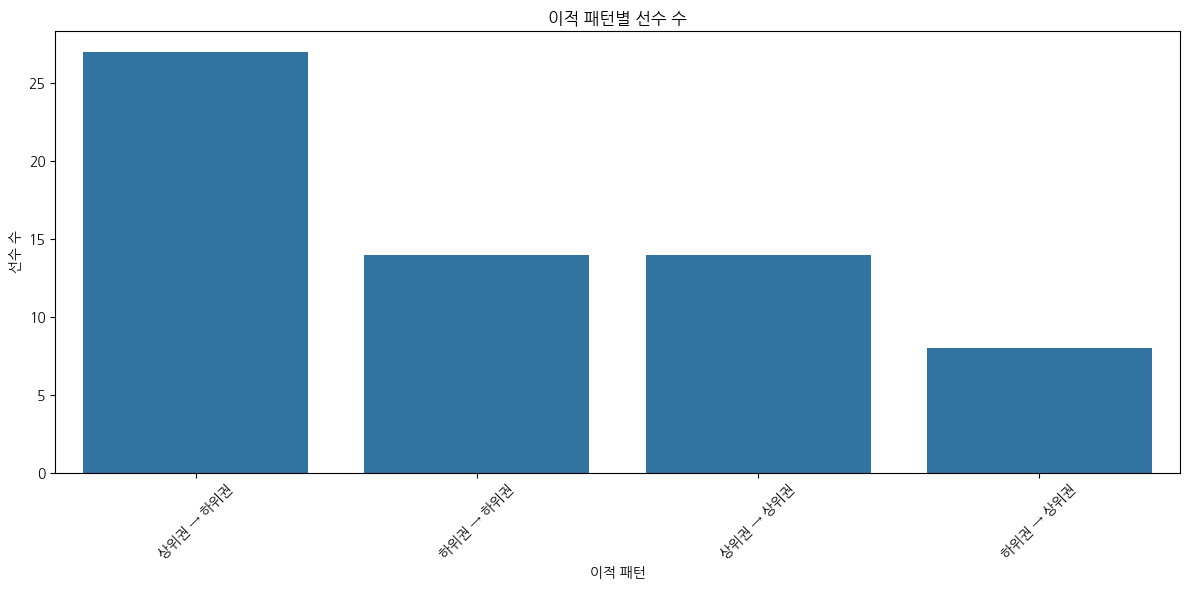

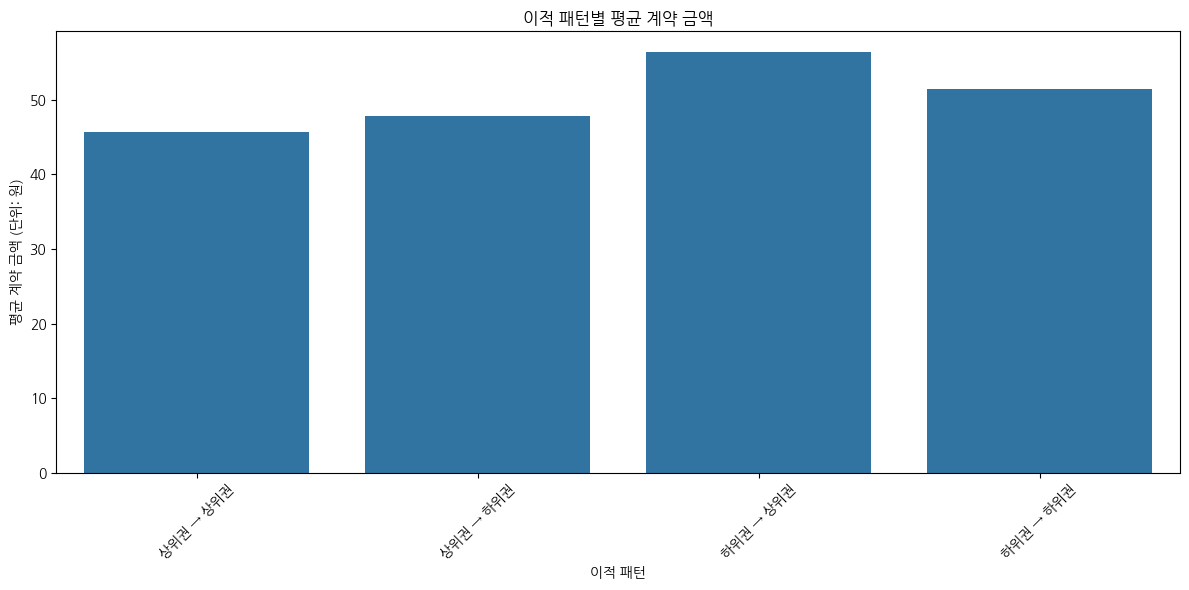

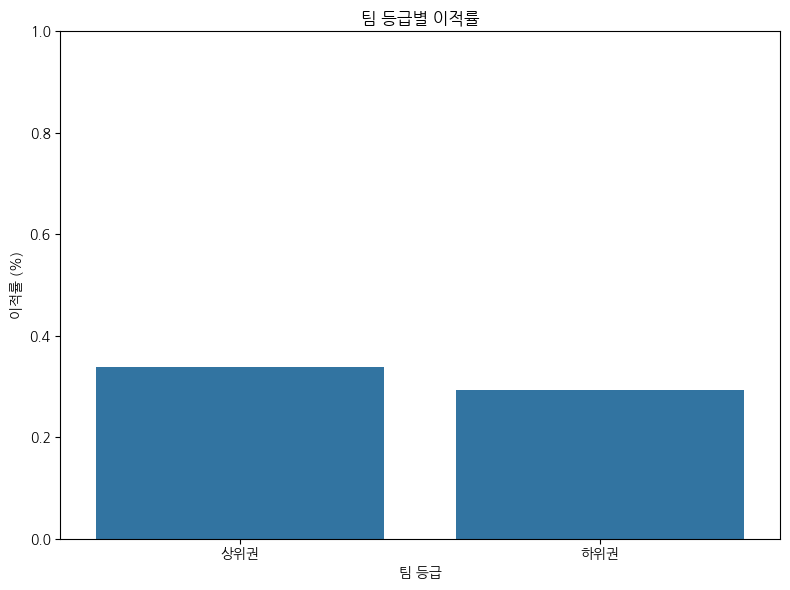

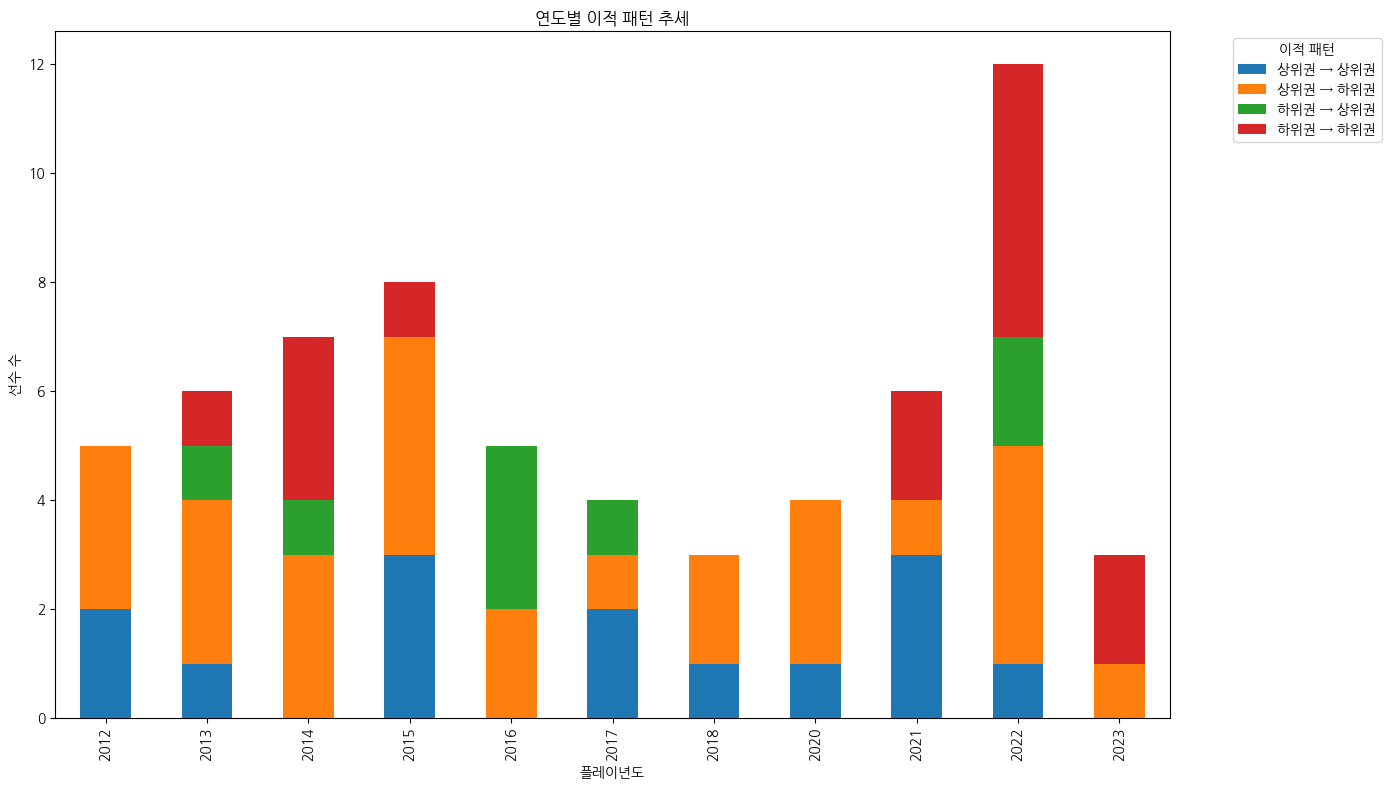

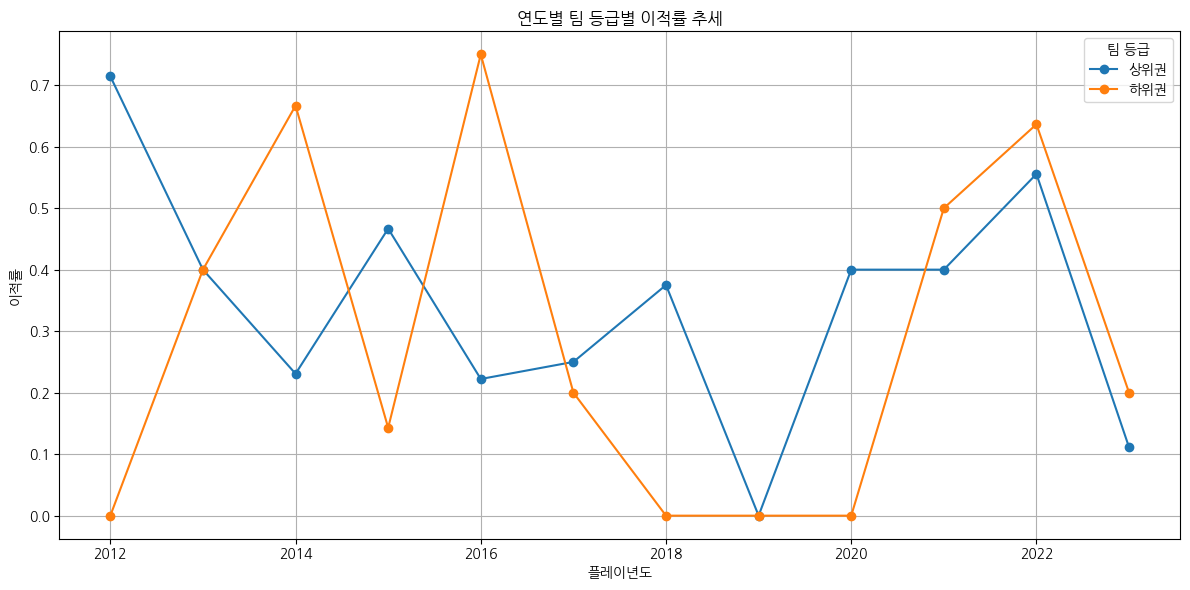

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 가정: combined_df는 이미 로드되어 있음

# 1. 이적한 선수와 잔류한 선수 필터링
transferred_players = combined_df[combined_df['잔류 여부'] == '이적']
remained_players = combined_df[combined_df['잔류 여부'] == '잔류']

# 2. 이적 패턴 생성 (Team Group -> After FA Team Group)
transferred_players['이적 패턴'] = transferred_players['Team Group'] + ' → ' + transferred_players['After FA Team Group']

# 3. 이적 패턴별 선수 수 분석
pattern_counts = transferred_players['이적 패턴'].value_counts().reset_index()
pattern_counts.columns = ['이적 패턴', '선수 수']

# 4. 이적 패턴별 평균 계약 금액 분석
pattern_avg_contract = transferred_players.groupby('이적 패턴')['FA 계약 총액'].agg(['mean', 'count', 'std']).reset_index()
pattern_avg_contract.columns = ['이적 패턴', '평균 계약 금액', '선수 수', '표준편차']

# 5. 이적 패턴별 계약 연수 분석
pattern_avg_years = transferred_players.groupby('이적 패턴')['FA 계약 연수'].agg(['mean', 'count', 'std']).reset_index()
pattern_avg_years.columns = ['이적 패턴', '평균 계약 연수', '선수 수', '표준편차']

# 6. 결과 출력
print("1. 이적 패턴별 선수 수:")
print(pattern_counts)

print("\n2. 이적 패턴별 평균 계약 금액 (단위: 원):")
print(pattern_avg_contract)

print("\n3. 이적 패턴별 평균 계약 연수:")
print(pattern_avg_years)

# 7. 상위권/하위권 별 이적률 분석
team_group_transfer_rate = combined_df.groupby('Team Group')['잔류 여부'].apply(
    lambda x: (x == '이적').sum() / len(x)
).reset_index()
team_group_transfer_rate.columns = ['팀 등급', '이적률']

print("\n4. 팀 등급별 이적률:")
print(team_group_transfer_rate)

# 8. 통계적 검정: 팀 등급과 이적 여부 관계 분석 (카이제곱 검정)
transfer_contingency = pd.crosstab(combined_df['Team Group'], combined_df['잔류 여부'])
print("\n5. 팀 등급과 이적 여부의 교차표:")
print(transfer_contingency)

chi2, p, dof, expected = chi2_contingency(transfer_contingency)
print(f"\n6. 카이제곱 검정 결과: chi2={chi2:.4f}, p={p:.4f}")
print(f"자유도: {dof}")
alpha = 0.05
if p < alpha:
    print(f"귀무가설 기각 (p={p:.4f} < {alpha}): 팀 등급과 이적 여부 사이에 통계적으로 유의한 관계가 있습니다.")
else:
    print(f"귀무가설 유지 (p={p:.4f} >= {alpha}): 팀 등급과 이적 여부 사이에 통계적으로 유의한 관계가 없습니다.")

# 9. 이적 패턴별 계약 금액 차이 분석 (ANOVA)
patterns = transferred_players['이적 패턴'].unique()
contract_groups = [transferred_players[transferred_players['이적 패턴'] == pattern]['FA 계약 총액'].dropna()
                  for pattern in patterns]

# 최소 2개 이상의 그룹이 있고, 각 그룹에 데이터가 있는 경우에만 ANOVA 실행
valid_groups = [group for group in contract_groups if len(group) > 0]
if len(valid_groups) >= 2:
    f_stat, p_anova = f_oneway(*valid_groups)
    print(f"\n7. 계약 금액에 대한 ANOVA 검정 결과: F={f_stat:.4f}, p={p_anova:.4f}")

    if p_anova < alpha:
        print(f"귀무가설 기각 (p={p_anova:.4f} < {alpha}): 이적 패턴에 따라 계약 금액에 유의한 차이가 있습니다.")

        # 사후 검정 (Post-hoc): Tukey HSD
        pattern_list = []
        contract_list = []

        for pattern, group in transferred_players.groupby('이적 패턴'):
            for amount in group['FA 계약 총액'].dropna():
                pattern_list.append(pattern)
                contract_list.append(amount)

        # Tukey HSD 검정 실행 (데이터가 충분한 경우)
        if len(pattern_list) > 0 and len(set(pattern_list)) >= 2:
            tukey = pairwise_tukeyhsd(contract_list, pattern_list, alpha=alpha)
            print("\n8. Tukey HSD 사후 검정 결과:")
            print(tukey)
    else:
        print(f"귀무가설 유지 (p={p_anova:.4f} >= {alpha}): 이적 패턴에 따른 계약 금액의 유의한 차이가 없습니다.")
else:
    print("\n패턴별 계약 금액 데이터가 부족하여 ANOVA 검정을 실행할 수 없습니다.")

# 10. 시각화: 이적 패턴별 선수 수
plt.figure(figsize=(12, 6))
sns.barplot(x='이적 패턴', y='선수 수', data=pattern_counts)
plt.title('이적 패턴별 선수 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('이적_패턴별_선수_수.png')

# 11. 시각화: 이적 패턴별 평균 계약 금액
plt.figure(figsize=(12, 6))
sns.barplot(x='이적 패턴', y='평균 계약 금액', data=pattern_avg_contract)
plt.title('이적 패턴별 평균 계약 금액')
plt.xticks(rotation=45)
plt.ylabel('평균 계약 금액 (단위: 원)')
plt.tight_layout()
plt.savefig('이적_패턴별_평균_계약금액.png')

# 12. 상위권과 하위권의 이적률 비교 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='팀 등급', y='이적률', data=team_group_transfer_rate)
plt.title('팀 등급별 이적률')
plt.ylabel('이적률 (%)')
plt.ylim(0, 1)  # 0~100% 범위 설정
plt.tight_layout()
plt.savefig('팀_등급별_이적률.png')

# 13. 연도별 이적 패턴 추세 분석
yearly_pattern = transferred_players.groupby(['플레이년도', '이적 패턴']).size().unstack().fillna(0)
print("\n9. 연도별 이적 패턴 추세:")
print(yearly_pattern)

# 14. 시각화: 연도별 이적 패턴 추세
plt.figure(figsize=(14, 8))
yearly_pattern.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('연도별 이적 패턴 추세')
plt.xlabel('플레이년도')
plt.ylabel('선수 수')
plt.legend(title='이적 패턴', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('연도별_이적_패턴.png')

# 15. 연도별 상위권/하위권 이적률 분석
yearly_transfer_rate = combined_df.groupby(['플레이년도', 'Team Group'])['잔류 여부'].apply(
    lambda x: (x == '이적').sum() / len(x)
).unstack().fillna(0)
print("\n10. 연도별 팀 등급별 이적률:")
print(yearly_transfer_rate)

# 16. 시각화: 연도별 상위권/하위권 이적률 추세
plt.figure(figsize=(12, 6))
yearly_transfer_rate.plot(kind='line', marker='o', ax=plt.gca())
plt.title('연도별 팀 등급별 이적률 추세')
plt.xlabel('플레이년도')
plt.ylabel('이적률')
plt.legend(title='팀 등급')
plt.grid(True)
plt.tight_layout()
plt.savefig('연도별_팀등급별_이적률.png')

# 17. 결론 요약
print("\n--- 분석 결과 요약 ---")

# 상위권/하위권 이적률 비교
high_transfer_rate = team_group_transfer_rate[team_group_transfer_rate['팀 등급'] == '상위권']['이적률'].values[0]
low_transfer_rate = team_group_transfer_rate[team_group_transfer_rate['팀 등급'] == '하위권']['이적률'].values[0]

print(f"1. 상위권 팀 이적률: {high_transfer_rate:.2%}, 하위권 팀 이적률: {low_transfer_rate:.2%}")

if high_transfer_rate > low_transfer_rate:
    print("   => 상위권 팀의 이적률이 하위권 팀보다 높습니다.")
else:
    print("   => 하위권 팀의 이적률이 상위권 팀보다 높습니다.")

# 가설 검증 결론
if p < alpha:
    print(f"2. 통계적 검증: 팀 등급과 이적 여부 사이에 유의한 관계가 있습니다 (p={p:.4f}).")
else:
    print(f"2. 통계적 검증: 팀 등급과 이적 여부 사이에 유의한 관계가 없습니다 (p={p:.4f}).")

# 이적 패턴별 인기 확인
top_pattern = pattern_counts.iloc[0]
print(f"3. 가장 많은 이적 패턴: {top_pattern['이적 패턴']} ({top_pattern['선수 수']}명)")

# 이적 패턴별 계약 금액 비교
if len(pattern_avg_contract) > 0:
    max_contract_pattern = pattern_avg_contract.loc[pattern_avg_contract['평균 계약 금액'].idxmax()]
    print(f"4. 평균 계약 금액이 가장 높은 이적 패턴: {max_contract_pattern['이적 패턴']} ({max_contract_pattern['평균 계약 금액']:,.0f}원)")